In [9]:
from matplotlib import pyplot as plt
import numpy as np
from  tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [28]:
img_path='/content/doggg.png'
img=load_img(img_path)

In [29]:
img_array=img_to_array(img)

In [30]:
img_array=img_array.reshape((1,)+img_array.shape)

In [31]:

datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

In [32]:
augmented_images=datagen.flow(img_array,batch_size=1)

In [33]:
def visualize_augmented_images(generator,num_images):
  fig,axes=plt.subplots(1,num_images,figsize=(20,20))
  for i in range(num_images):
    batch=next(generator)
    aug_image=batch[0]
    axes[i].imshow(aug_image)
    axes[i].axis('off')
  plt.show()

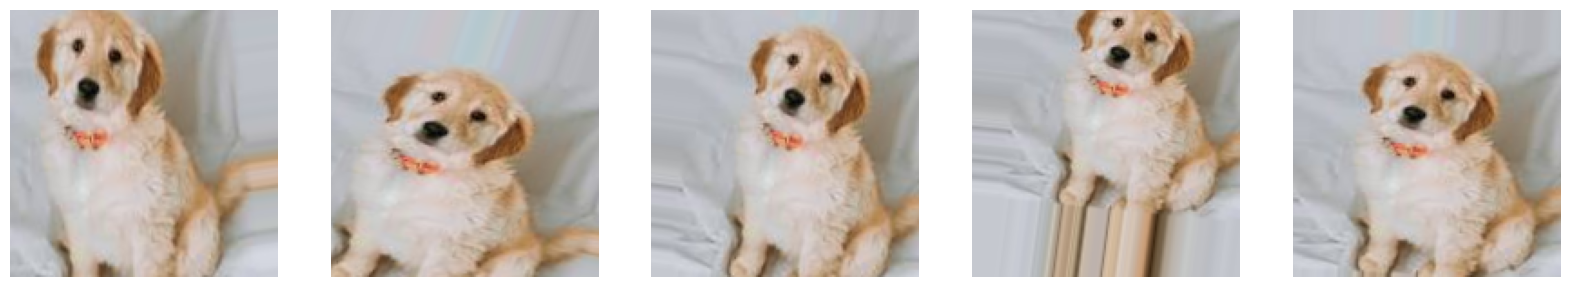

In [34]:

visualize_augmented_images(augmented_images,5)

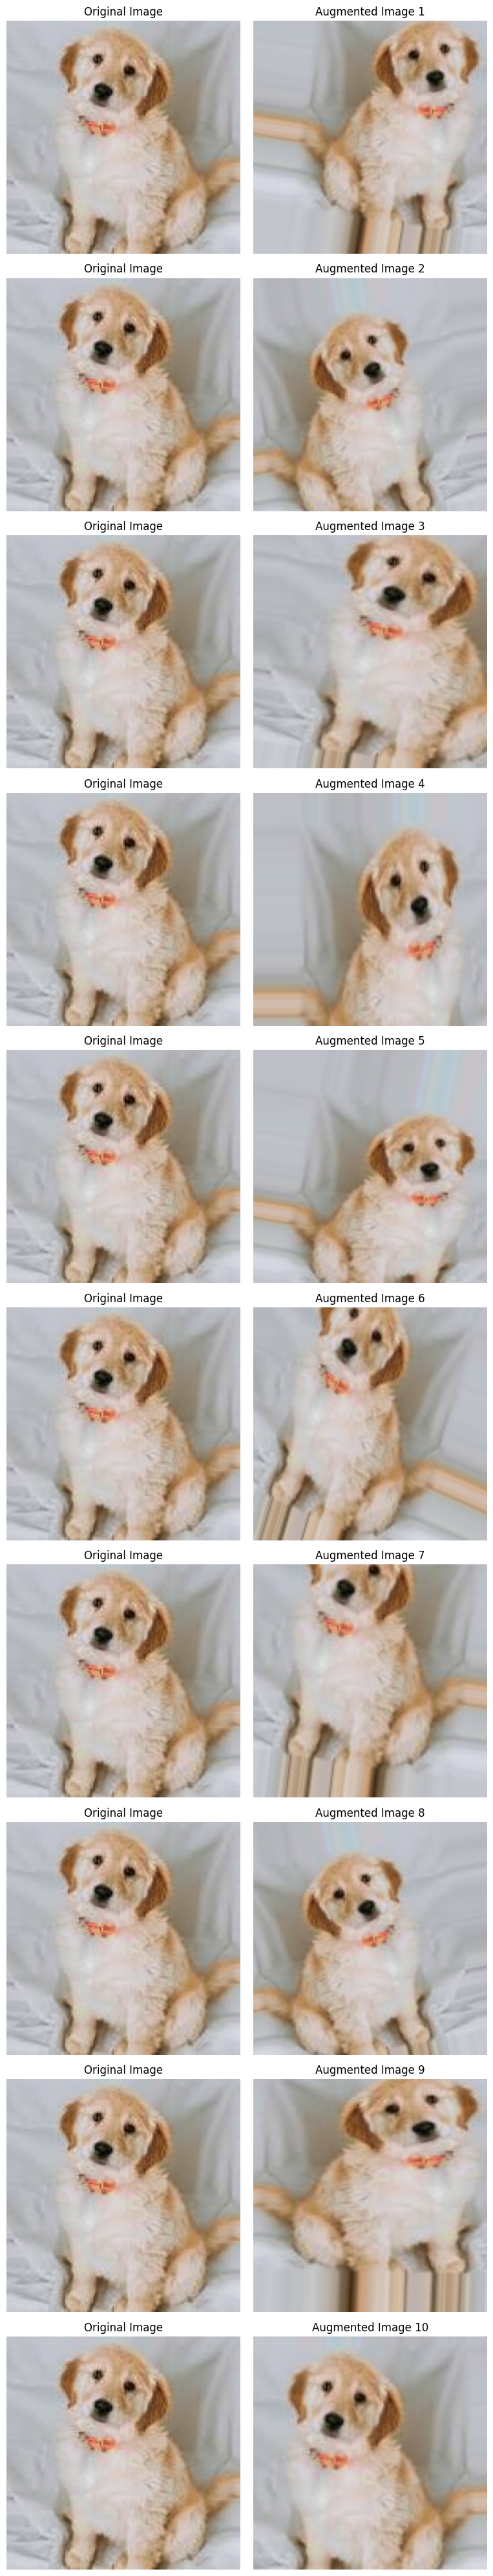

In [40]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the original image
img_path = '/content/doggg.png'
img = load_img(img_path)
img_array = img_to_array(img)

# Reshape for ImageDataGenerator
img_array = img_array.reshape((1,) + img_array.shape)

# Data augmentation configuration
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
augmented_images = datagen.flow(img_array, batch_size=1)

# Function to display the original and augmented images side by side
def visualize_original_and_augmented(original_img, generator, num_images):
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 4 * num_images))

    # Ensure original is rescaled like augmented images
    original_rescaled = np.array(original_img) / 255.0

    for i in range(num_images):
        aug_batch = next(generator)
        aug_image = aug_batch[0]

        # Column 0: Original image
        axes[i, 0].imshow(original_rescaled)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis('off')

        # Column 1: Augmented image
        axes[i, 1].imshow(aug_image)
        axes[i, 1].set_title(f"Augmented Image {i+1}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_original_and_augmented(img, augmented_images, 10)